# Multiple Linear Regression
## prediction of demand for shared bikes

#### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
- To identify the which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands
- Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily   bike demands across the American market based on some factors
- To know the accuracy of the model, i.e. how well these variables can predict the demand for shared bikes.

**So interpretation is important!**

## Step 1: Reading and Understanding the Data

In [133]:
#importing required Libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#ignoring the warnings
import warnings
warnings.filterwarnings('ignore')


In [134]:
#Loading data set
df=pd.read_csv('day.csv')

In [135]:
# Check the head of the dataset
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [136]:
# Check the info of the dataset to see if any quality issues in the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [137]:
# summary of statistics pertaining to the DataFrame columns.
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2: Visualising the Data

most important step 'understanding the data' visually.
- Here we can identify if there is some obvious multicollinearity going on 
- Here we will also identify if some predictors directly have a strong association with the outcome variable


#### Visualising Numeric Variables

Let's make a heatmap for all the numeric variables

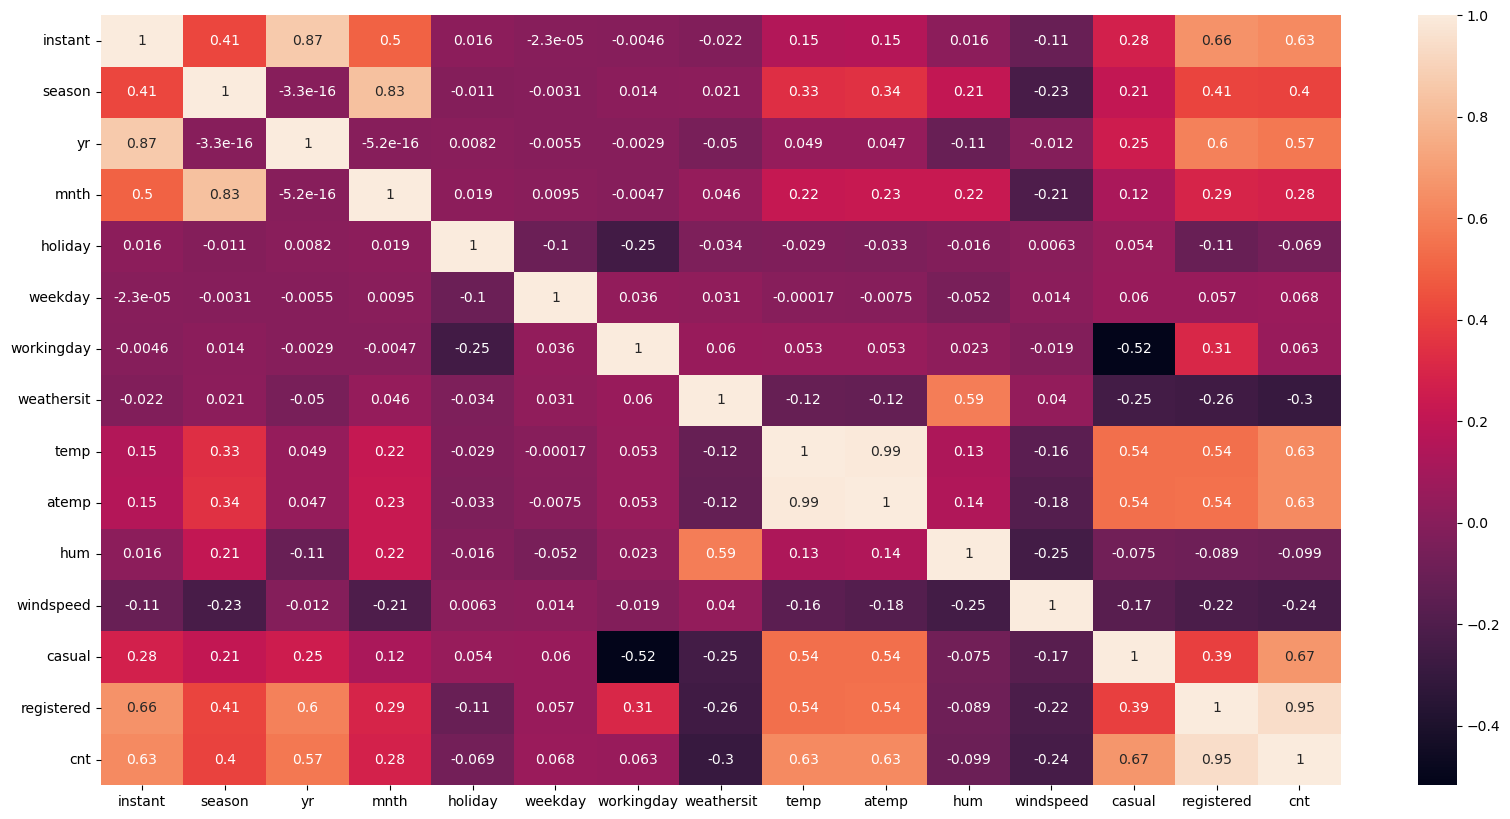

In [138]:
#Heatmap for numeric variables
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [139]:
# from the heatmap it shows that correltion between temp & atemp is very high hence we drop that column
df = df.drop(columns='atemp',axis=1)

In [140]:
#Dropping instant because it is just a serialnumber of the number of records
#Dropping dteday because required data for analysis is contained in month & year
#Dropping 'casual'& 'registered' because casual + registered = cnt

df = df.drop(columns=['instant','dteday','casual','registered'])

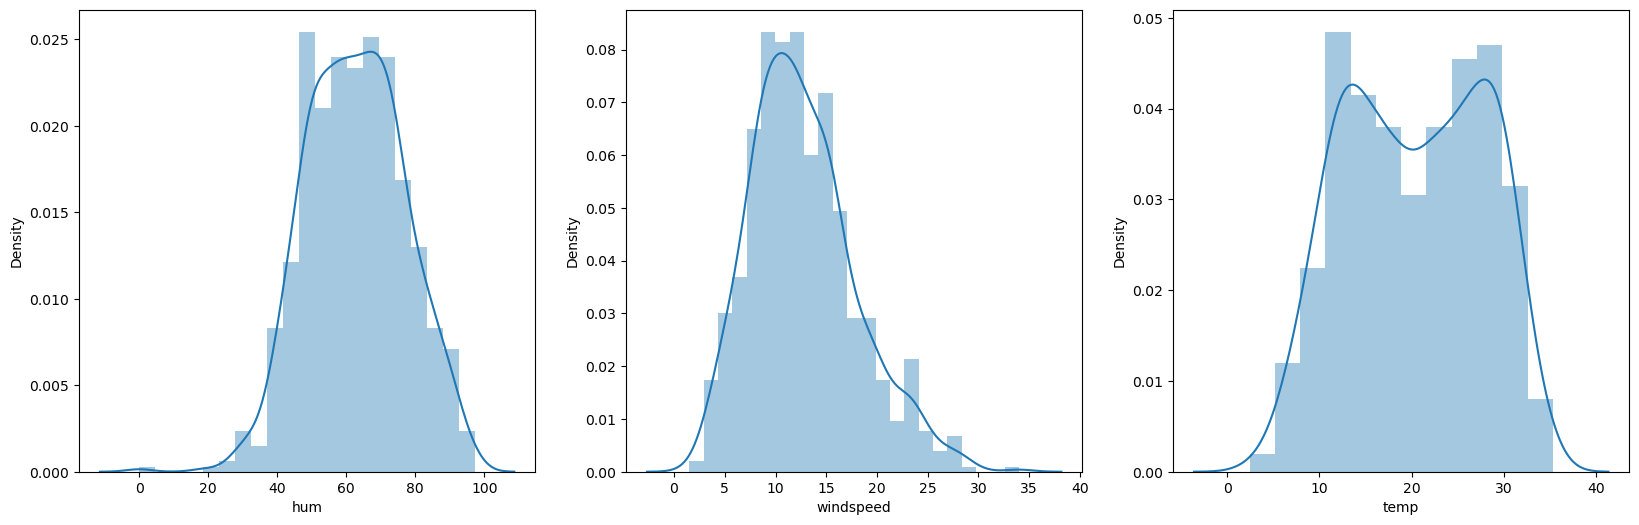

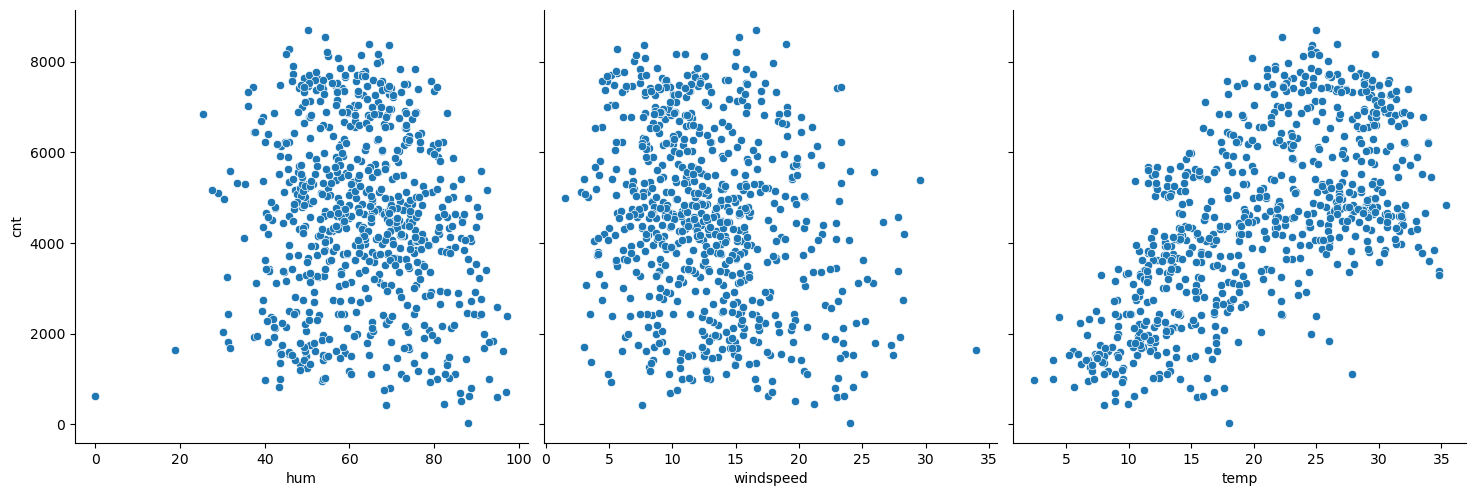

In [141]:
# Check the outliers for the numerical variables
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.distplot(df['hum'])

plt.subplot(1,3,2)
sns.distplot(df['windspeed'])

plt.subplot(1,3,3)
sns.distplot(df['temp'])

sns.pairplot(data=df,x_vars=['hum','windspeed','temp'],y_vars='cnt',kind='scatter',height=5,aspect=1)
plt.show()

In [142]:
#Replacing numerical value of catagorial variable with catagoty values
df['season']=df['season'].apply(lambda x: 'spring' if x==1 else ('summer' if x==2 else ('fall' if x==3 else 'winter')))
df['mnth']=df['mnth'].apply(lambda x: 'january' if x==1 else ('february' if x==2 else ('march' if x==3 else ('april' if x==4 else ('may' if x==5 else ('june' if x==6 else ('july' if x==7 else ('august' if x==8 else ('september' if x==9 else ('october' if x==10 else ('november' if x==11 else 'december')))))))))))
df['weekday']=df['weekday'].apply(lambda x: 'sunday' if x==0 else ('monday' if x==1 else ('tuesday' if x==2 else ('wednesday' if x==3 else ('thursday' if x==4 else ('friday' if x==5 else 'saturday'))))))
df['weathersit']=df['weathersit'].apply(lambda x: 'Clear' if x==1 else ('Mist + Cloudy' if x==2 else ('Light Snow' if x==3 else 'Heavy Rain')))

In [143]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,january,0,saturday,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,january,0,sunday,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,january,0,monday,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,january,0,tuesday,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,january,0,wednesday,1,Clear,9.305237,43.6957,12.522300,1600


In [144]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

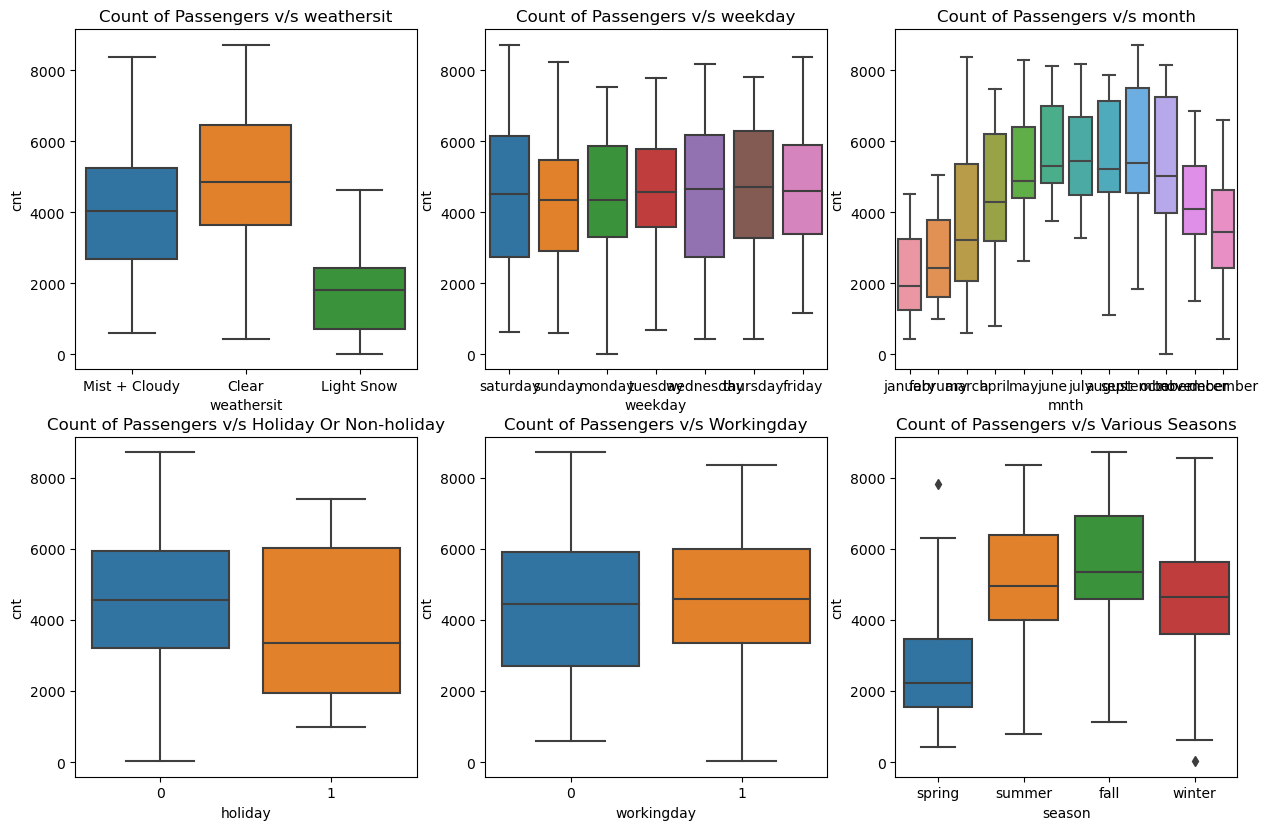

In [145]:
# Plotting box plot for categorical variables against 'cnt'

#Set the figuresize
plt.figure(figsize=(15,15)) 

plt.subplot(3,3,1)
sns.boxplot(x='weathersit',y='cnt',data=df).set_title('Count of Passengers v/s weathersit')

plt.subplot(3,3,2)
sns.boxplot(x='weekday',y='cnt',data=df).set_title('Count of Passengers v/s weekday')

plt.subplot(3,3,3)
sns.boxplot(x='mnth',y='cnt',data=df).set_title('Count of Passengers v/s month')

plt.subplot(3,3,4)
sns.boxplot(x='holiday',y='cnt',data=df).set_title('Count of Passengers v/s Holiday Or Non-holiday')

plt.subplot(3,3,5)
sns.boxplot(x='workingday',y='cnt',data=df).set_title('Count of Passengers v/s Workingday')


plt.subplot(3,3,6)
sns.boxplot(x='season',y='cnt',data=df).set_title('Count of Passengers v/s Various Seasons')

plt.show()

The inference from above plot:

- season: most of the bike booking were happening in season3 with a median of over 5000 booking (for the period of 2 years). 
  This was followed by season2 & season4. This indicates, season can be a good predictor for the dependent variable.

- mnth: Almost 10% of the bike booking were happening in the months 5,6,7,8,9 and 10 with a median of over 4000 booking per month. This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable.

- weathersit: most of the bike booking were happening during ‘weathersit1 with a median of close to 5000 booking. 
  This was followed by weathersit2. This indicates, weathersit does show some trend towards the bike bookings can be a good   predictor for the dependent variable.

- holiday: Most of the bike booking were happening when it is not a holiday which means this data is clearly biased. 
  This indicates, holiday cannotbe a good predictor for the dependent variable.

- weekday: weekday variable shows very close trend having their independent medians between 4000 to 5000 bookings. 
  This variable can have some or no influence towards the predictor.

- workingday: Most of the bike booking were happening in ‘workingday’ with a median of close to 5000 booking .
  This indicates, workingday can be a good predictor for the dependent variable

#### Visualising Catagorical Variables

Let's make a box plot for all the Catagorical variables

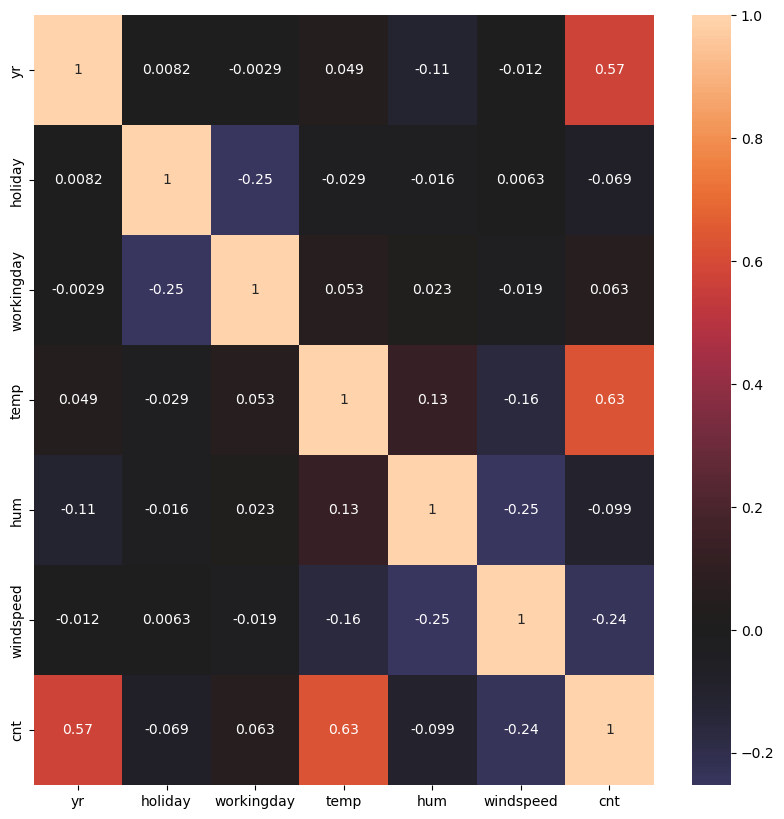

In [146]:
plt.figure(figsize=[10,10])
sns.heatmap(df.corr(),center=0,annot=True)
plt.show()

## Step 3: Data Preparation
Lets create dummy variables

In [147]:
# creating dummy variables for season,month,weekdays,weathersit 
season_var = pd.get_dummies(df['season'],drop_first=True)
mnoth_var = pd.get_dummies(df['mnth'],drop_first=True)
weekday_var = pd.get_dummies(df['weekday'],drop_first=True)
weathersit_var = pd.get_dummies(df['weathersit'],drop_first=True)

In [148]:
# Concatenate dummy variables which are created newly to the df dataset
df=pd.concat([df,season_var,mnoth_var,weekday_var,weathersit_var],axis=1)

# Drop the 'season','mnth','weekday','weathersit' varaibles, since we derived dummy variables from these variables
df = df.drop(columns=['season','mnth','weekday','weathersit'])

## Step 4: Splitting the Data into Training and Testing Sets

As we know, the first basic step for regression is performing a train-test split.

In [149]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.80, test_size = 0.20, random_state = 120)

#### Rescaling the Features 

scaling doesn't impact the predictions

as we know there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

Now we will use MinMax scaling

In [150]:
# Createing scaler using MinMaxScaler so that we can apply scaler to all the columns except dummy variables
scaler = MinMaxScaler()

# Apply scaler to all columns except dummy variables
numeric_features = ['hum','windspeed','temp','cnt']

df_train[numeric_features] = scaler.fit_transform(df_train[numeric_features])

In [151]:
# Now check the head of the train dataset
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,Light Snow,Mist + Cloudy
607,1,0,1,0.878510,0.610390,0.348643,0.843074,0,0,0,...,0,0,0,0,0,0,0,0,0,0
567,1,0,0,0.758058,0.792208,0.170644,0.849977,0,0,0,...,0,0,0,0,1,0,0,0,0,1
83,0,0,1,0.255486,0.514286,0.497012,0.251726,0,1,0,...,0,0,0,0,0,0,0,0,0,0
43,0,0,0,0.320723,0.475211,0.568959,0.180281,1,0,0,...,0,0,0,0,1,0,0,0,0,0
537,1,0,1,0.895124,0.596104,0.382780,0.667395,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [152]:
# summary of statistics pertaining to the train set columns.
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,Light Snow,Mist + Cloudy
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.498288,0.029110,0.681507,0.543349,0.652196,0.397248,0.515488,0.248288,0.248288,0.243151,...,0.080479,0.075342,0.147260,0.157534,0.131849,0.142123,0.140411,0.147260,0.027397,0.330479
std,0.500426,0.168258,0.466291,0.230683,0.147679,0.186373,0.220931,0.432390,0.432390,0.429353,...,0.272267,0.264169,0.354669,0.364616,0.338617,0.349476,0.347711,0.354669,0.163378,0.470789
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.340113,0.539394,0.259259,0.368442,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.553070,0.654545,0.371641,0.520766,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.743521,0.759091,0.502944,0.670156,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X and Y sets for the model building

In [153]:
y_train = df_train.pop('cnt')
X_train = df_train

## Building our model

we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (Recursive feature elimination)

In [154]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, n_features_to_select=15,step=1)

# Fit with 15 features
rfe = rfe.fit(X_train, y_train)

In [155]:
#listdown all the rankfeatures with its ranking
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 10),
 ('winter', True, 1),
 ('august', False, 14),
 ('december', True, 1),
 ('february', True, 1),
 ('january', True, 1),
 ('july', True, 1),
 ('june', False, 12),
 ('march', False, 13),
 ('may', False, 4),
 ('november', True, 1),
 ('october', False, 11),
 ('september', True, 1),
 ('monday', False, 5),
 ('saturday', False, 2),
 ('sunday', False, 6),
 ('thursday', False, 9),
 ('tuesday', False, 7),
 ('wednesday', False, 8),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1)]

In [156]:
#listdown 15 features 
col = X_train.columns[rfe.support_]

## Step 5: Building a linear model

In [157]:
# Creating dataset with with 15 features
X_train_rfe = X_train[col]
X_train_rfe

,yr,holiday,temp,hum,windspeed,spring,winter,december,february,january,july,november,september,Light Snow,Mist + Cloudy
607,1,0,0.878510,0.610390,0.348643,0,0,0,0,0,0,0,0,0,0
567,1,0,0.758058,0.792208,0.170644,0,0,0,0,0,1,0,0,0,1
83,0,0,0.255486,0.514286,0.497012,0,0,0,0,0,0,0,0,0,0
43,0,0,0.320723,0.475211,0.568959,1,0,0,1,0,0,0,0,0,0
537,1,0,0.895124,0.596104,0.382780,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,1,0,0.802708,0.726407,0.289350,0,0,0,0,0,1,0,0,0,1
10,0,0,0.137016,0.713105,0.237946,1,0,0,0,1,0,0,0,0,1
382,1,0,0.304288,0.460606,0.937653,1,0,0,0,1,0,0,0,0,0
158,0,0,0.893047,0.646320,0.272980,0,0,0,0,0,0,0,0,0,0


In [158]:
#Defining a function to Calculate the VIFs for the new models
def VIF(VIF_X_train):
    vif = pd.DataFrame()
    X = VIF_X_train
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [159]:

# defining function for Adding a constant variable 
def LR_Model(X_train_LR):
    X_train_lm = sm.add_constant(X_train_LR)
    LR_Model = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
    return LR_Model

In [160]:

print(LR_Model(X_train_rfe).summary())
print(VIF(X_train_rfe))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     197.2
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          1.12e-213
Time:                        21:27:29   Log-Likelihood:                 586.70
No. Observations:                 584   AIC:                            -1141.
Df Residuals:                     568   BIC:                            -1071.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3806      0.032     12.066

- Removing the variable 'hum' based on its Very High 'VIF' value.


In [161]:
X_train_rfe_new = X_train_rfe.drop(['hum'], axis=1)
print(LR_Model(X_train_rfe_new).summary())
print(VIF(X_train_rfe_new))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     204.1
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          3.80e-211
Time:                        21:27:29   Log-Likelihood:                 577.91
No. Observations:                 584   AIC:                            -1126.
Df Residuals:                     569   BIC:                            -1060.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3000      0.025     11.871

- Removing the variable 'February' based on its p-value value.

In [163]:
X_train_rfe_new = X_train_rfe_new.drop(['february'], axis=1)
print(LR_Model(X_train_rfe_new).summary())
print(VIF(X_train_rfe_new))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     217.6
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          4.11e-211
Time:                        21:28:41   Log-Likelihood:                 575.04
No. Observations:                 584   AIC:                            -1122.
Df Residuals:                     570   BIC:                            -1061.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2876      0.025     11.584

- Removing the january based on its p value

In [164]:
X_train_rfe_new = X_train_rfe_new.drop(['january'], axis=1)
print(LR_Model(X_train_rfe_new).summary())
print(VIF(X_train_rfe_new))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     233.0
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          6.59e-211
Time:                        21:28:41   Log-Likelihood:                 571.73
No. Observations:                 584   AIC:                            -1117.
Df Residuals:                     571   BIC:                            -1061.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2704      0.024     11.263

- Removing the july variable based on the p value

In [165]:
X_train_rfe_new = X_train_rfe_new.drop(['july'], axis=1)
X_train_lm_Final = sm.add_constant(X_train_rfe_new)
LR_Model_Final = sm.OLS(y_train,X_train_lm_Final).fit()   # Running the linear model
print(LR_Model_Final.summary())
print(VIF(X_train_rfe_new))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     249.8
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          3.60e-210
Time:                        21:28:41   Log-Likelihood:                 567.13
No. Observations:                 584   AIC:                            -1110.
Df Residuals:                     572   BIC:                            -1058.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2804      0.024     11.714

##  so our model is ready with VIF less than 5 with Rsquare as 82% 

## Step 6:Residual Analysis of the train data

In [166]:
y_train_cnt = LR_Model_Final.predict(X_train_lm_Final)

Text(0.5, 0, 'Errors')

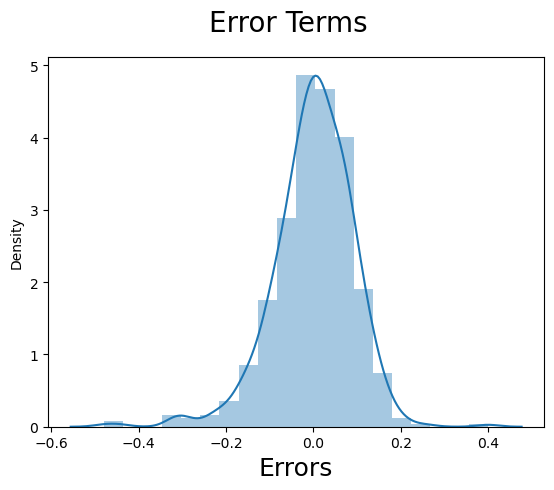

In [167]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)

# Plot heading 
fig.suptitle('Error Terms', fontsize = 20)

# X-label
plt.xlabel('Errors', fontsize = 18)

## - The residuals are normally distributed with mean 0.

Text(0, 0.5, 'error')

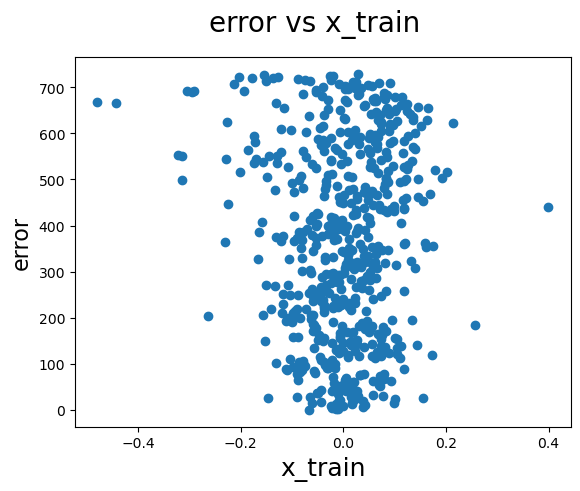

In [168]:
error = y_train - y_train_cnt
fig = plt.figure()
plt.scatter(error,X_train_rfe.index)
fig.suptitle('error vs x_train', fontsize=20)  
plt.xlabel('x_train', fontsize=18)
plt.ylabel('error', fontsize=16)


- From the above plot ,we can see that residuals are independent of each others. 
###  Second assumption on homoscedasticity satisfied

## Step 7:Making Predictions on Test data

#### Applying the scaling on the test sets

In [169]:

# Applying scaling to all the columns except the '0-1' and 'dummy' variables
num_vars = ["temp", "hum", "windspeed", "cnt"]

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [170]:
# Split the 'df_test' set into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [171]:


# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)
# Making predictions
y_pred = LR_Model_Final.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

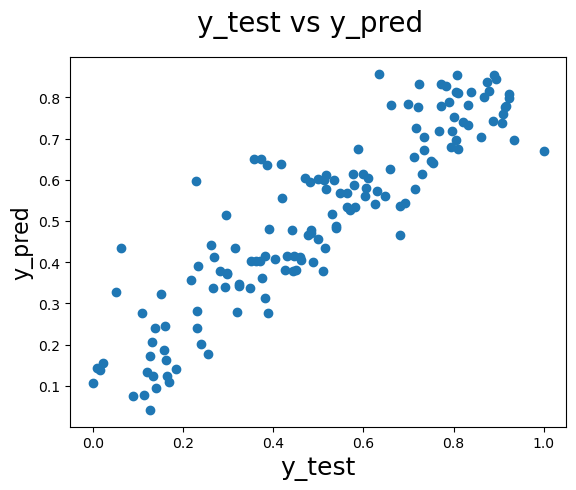

In [172]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)

# Plot heading 
fig.suptitle('y_test vs y_pred', fontsize=20)

# X-label
plt.xlabel('y_test', fontsize=18)

# Y-label
plt.ylabel('y_pred', fontsize=16)

We can see that the equation of our best fitted line is:

$cnt = 0.2804+yr \times 0.2297- holiday \times 0.0749+temp \times 0.3870-windspeed \times 0.0857-spring \times 0.1328+winter \times 0.0859
-december \times 0.0636-november \times 0.0783+september \times  0.0578-(Light Snow) \times 0.2679-(Mist and Cloudy) \times 0.0794$

#### R2 score on the test data

In [179]:
#Final R2 score on the test data
r2=r2_score(y_test,y_pred)
r2

0.8085430134541242

In [181]:
# n is number of rows in X

n = X_test_new.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test_new.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7912686988785564

Conclusion:
- From the final model summary, it is evident that all our coefficients are not equal to zero,which means We REJECT the NULL HYPOTHESIS
- F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.
        F-statistic: 269

### Final Result Comparison

- Train R^2 :0.828
- Train Adjusted R^2 :0.824
- Test R^2 :0.808
- Test Adjusted R^2 :0.791
- This seems to be a really good model that can very well 'Generalize' various datasets.

## Demand of bikes depend on year,holiday,temp,windspeed,spring,winter  ,december,november ,september ,Light Snow,(Mist + Cloudy).